# 2. Identify Datetimes for Split

In [8]:
%store -r df

We know we have a date column, but let's use some code from the class to verify. 

In [2]:
df.select_dtypes(include='datetime').shape

(1067371, 1)

In [3]:
def contains_date(column):
#     remove nas first, potentially use all
    regex_string = (r'^\d{1,2}-\d{1,2}-\d{4}$|^\d{4}-\d{1,2}-\d{1,2}$' + 
'|^\d{1,2}\/\d{1,2}\/\d{4}$|^\d{4}\/\d{1,2}\/\d{1,2}$')
    return column.str.contains(regex_string).any()

In [4]:
contains_date = df.apply(lambda col: contains_date(col))

In [5]:
df[contains_date[contains_date == True].index][:3]

""
0
1
2


This shows us that we have zero columns with dates. Before I move to splitting the data, I feel obligated to correct the date column. 

In [9]:
# Let's revist the data frame
df[:3]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [12]:
import pandas as pd

# Initiates the `date_column` into a datetime object. 
date_column = pd.to_datetime(df.invoicedate)

In [13]:
# Adds the new column at the end of a renamed data frame
date_df = df.assign(date_and_time = date_column)

In [14]:
# Adds only the date at the end of the data frame as a column
date_df['date'] = date_df['date_and_time'].dt.date

In [15]:
# Adds only the time at the end of the data frame as a column
date_df['time'] = date_df['date_and_time'].dt.time

In [16]:
# Revisite the date_df
date_df[:3]

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00


In [20]:
# Let's confirm we transformed date_and_time into datetime64
date_df.dtypes

invoice                  object
stockcode                object
description              object
quantity                  int64
invoicedate              object
price                   float64
customer_id             float64
country                  object
date_and_time    datetime64[ns]
date             datetime64[ns]
time                     object
dtype: object

In [23]:
# Seems only logical we do it to the `date` column as well
date_df['date'] = pd.to_datetime(date_df['date'])

# Converting date into a numerical value, as per [here]
#(https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date).
#date_df['date'] = date_df['date'].map(dt.datetime.toordinal)

In [24]:
date_df.dtypes

invoice                  object
stockcode                object
description              object
quantity                  int64
invoicedate              object
price                   float64
customer_id             float64
country                  object
date_and_time    datetime64[ns]
date             datetime64[ns]
time                     object
dtype: object

In [25]:
date_df.head(100)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
...,...,...,...,...,...,...,...,...,...,...,...
95,489441,22111,SCOTTIE DOG HOT WATER BOTTLE,48,2009-12-01 09:44:00,4.25,18087.0,United Kingdom,2009-12-01 09:44:00,2009-12-01,09:44:00
96,489442,21955,UNION JACK GUNS & ROSES DOORMAT,2,2009-12-01 09:46:00,6.75,13635.0,United Kingdom,2009-12-01 09:46:00,2009-12-01,09:46:00
97,489442,22111,SCOTTIE DOG HOT WATER BOTTLE,3,2009-12-01 09:46:00,4.95,13635.0,United Kingdom,2009-12-01 09:46:00,2009-12-01,09:46:00
98,489442,22296,HEART IVORY TRELLIS LARGE,12,2009-12-01 09:46:00,1.65,13635.0,United Kingdom,2009-12-01 09:46:00,2009-12-01,09:46:00


In [26]:
# Storing date_df 
%store date_df

Stored 'date_df' (DataFrame)


### Analyzing date column

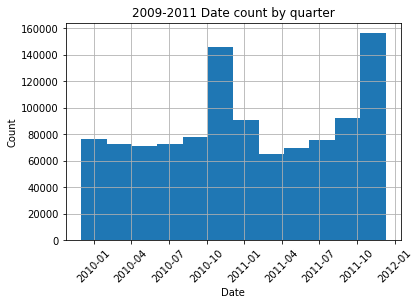

In [117]:
import matplotlib.pyplot as plt

# Selected 12 bins to reflect quarters for 2009, 2010, 2011
date_df.date.hist(bins = 12)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('2009-2011 Date count by quarter');

We know we have 2009 data, but it doesn't seem to be showing in the graph. Perhaps there weren't a lot of enteries, but that will have to be uncovered later. The reason this is troubling is because it seems like there is a seasonal increase towards the end of the year in 2010 and in 2011. If we were going to select a time frame to select dates, then I'd like to see 2009's increase. Let's investigate further.

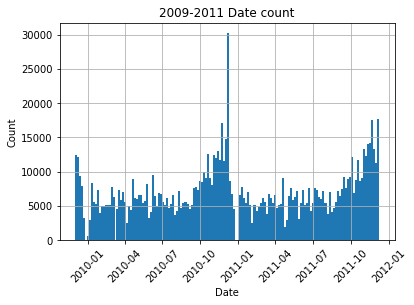

In [115]:
date_df.date.hist(bins = 150)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('2009-2011 Date count');

Here we see that we have two peaks in data, both towards the year end quarter. This might explain why there are almost no 2009 bars, but, I'm not sure. 

In [27]:
start_date = '2009-01-01'
end_date = '2009-12-31'

In [30]:
mask = date_df[(date_df['date'] > start_date) & (date_df['date'] <= end_date)]
mask.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,2009-12-01,07:45:00


In [31]:
mask.tail()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,date_and_time,date,time
45223,493408,90058B,CRYSTAL STUD EARRINGS ASSORTED COL,1,2009-12-23 16:21:00,0.38,NaN,United Kingdom,2009-12-23 16:21:00,2009-12-23,16:21:00
45224,493408,21933,PINK VINTAGE PAISLEY PICNIC BAG,1,2009-12-23 16:21:00,2.95,NaN,United Kingdom,2009-12-23 16:21:00,2009-12-23,16:21:00
45225,493408,21937,STRAWBERRY PICNIC BAG,1,2009-12-23 16:21:00,2.95,NaN,United Kingdom,2009-12-23 16:21:00,2009-12-23,16:21:00
45226,493408,21936,RED/WHITE SPOT PICNIC BAG,1,2009-12-23 16:21:00,2.95,NaN,United Kingdom,2009-12-23 16:21:00,2009-12-23,16:21:00
45227,493409,20747,PICCADILLY TEA SET,48,2009-12-23 16:58:00,12.75,17819.0,United Kingdom,2009-12-23 16:58:00,2009-12-23,16:58:00


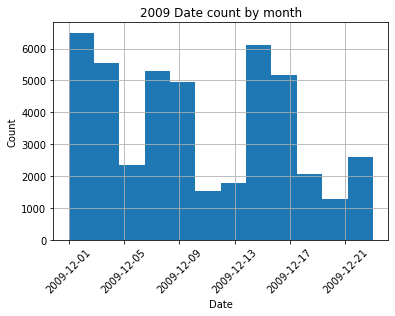

In [33]:
import matplotlib.pyplot as plt

mask.date.hist(bins=12)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('2009 Date count by month');

Okay, so there are 2009 entries in this data set, there just isn't a substantial number to be visual on the original graph. What's unfortunate is that there wasn't a large seasonal spike like in 2010 and in 2011. Let's continue our date analysis.

In [35]:
date_df.price.mean()

4.649387727416239

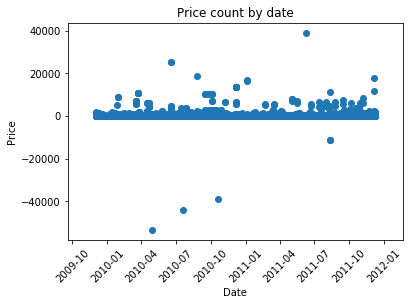

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=date_df.date, y=date_df.price)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price count by date')
plt.show();

In [121]:
date_df.Quantity.mean()

9.9388984711033

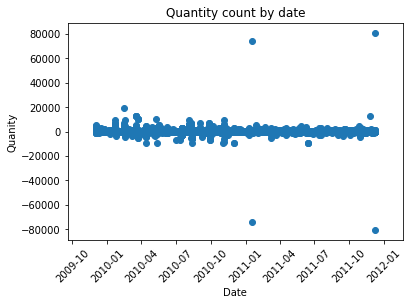

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=date_df.date, y=date_df.Quantity)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Quanity')
plt.title('Quantity count by date')
plt.show();

Right now I'm thinking that there are some outliers that I'll have to clear. It doesn't make snese that Price or Quantity should be negative. 

Additionally, I think I'll have to see how to divide the train and test split. If I understand correctly, the example from class took the IMBD movie dataset and it grabbed the most recent movies (I'm not sure how it selected it). The reason is that there was a greater concentration of movies in the dataset that were from the past, say 20 to 30 years. I Googled how deal with this, but not that hard. I got a forecasting on training set link, but that's in R. I'm not sure this is the right path, but I'm interested. 

- [link 1](https://otexts.com/fpp2/forecasting-on-training-and-test-sets.html)
    - [link 2 in Python](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)
 

*** Things to do ***

Find the file that explains why you want to look at the date. Understand the reasoning and apply it here. You'll be asked to find this later on in step 5, but you might as well get a head start. 

USE THIS LINK: https://www.kaggle.com/rgrajan/time-series-exploratory-data-analysis-forecast

*** Things to do ***

Next up, let's deal with numerical values. 

1. Target Value Identification and Exploration

2. Identify Datetimes for Split

3. **Numerical Values and DateTime Values**

4. Boolean and Categorical Values

5. Coercing Datetimes (add_datepart), and handling na values

6. Train and Score Initial Model 

7. Plot/Coerce Target Variable (optional)